# Import necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


# Load the Data

In [2]:
# load data into pandas DataFrame
car_data = pd.read_csv("car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA

In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.duplicated().sum()

2

In [8]:
#lets remove duplicated data
car_data.drop_duplicates(inplace=True)
car_data.duplicated().sum()

0

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


# Visualize Data

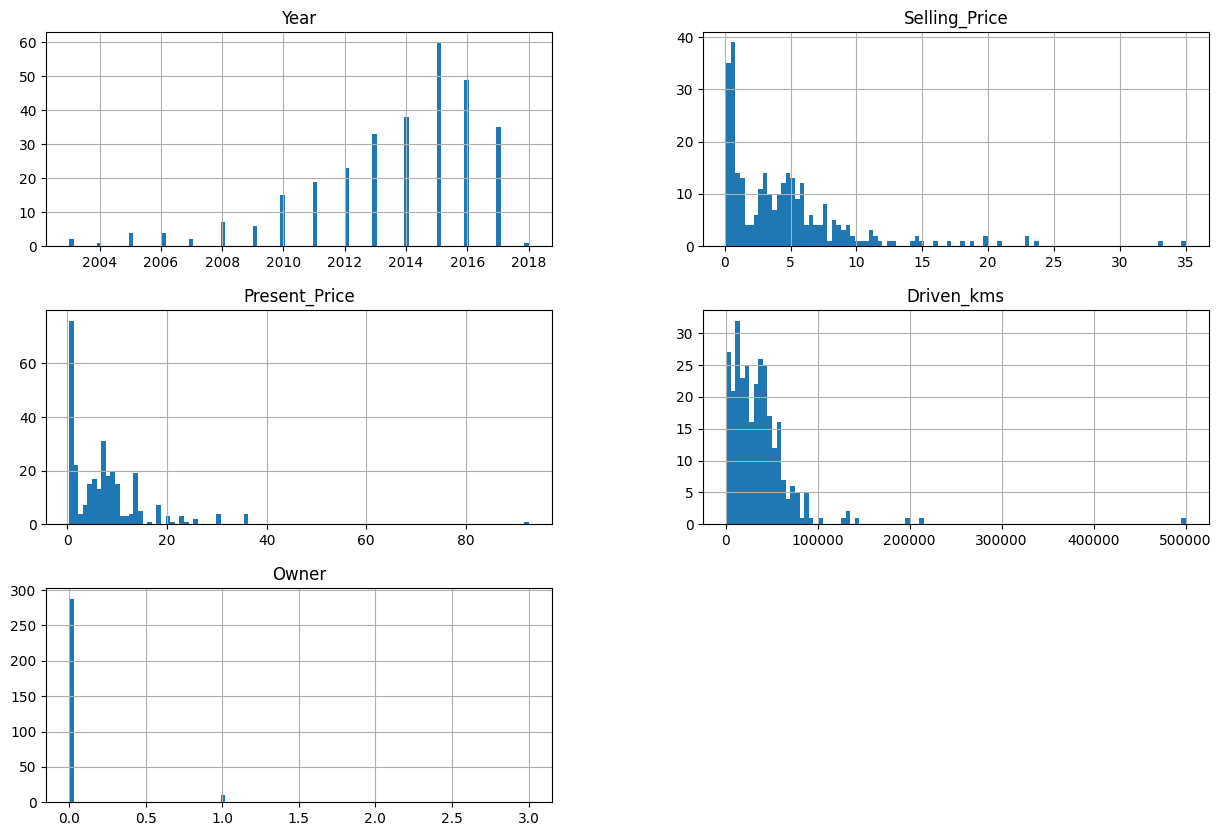

In [10]:
car_data.hist(bins = 100, figsize =(15,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

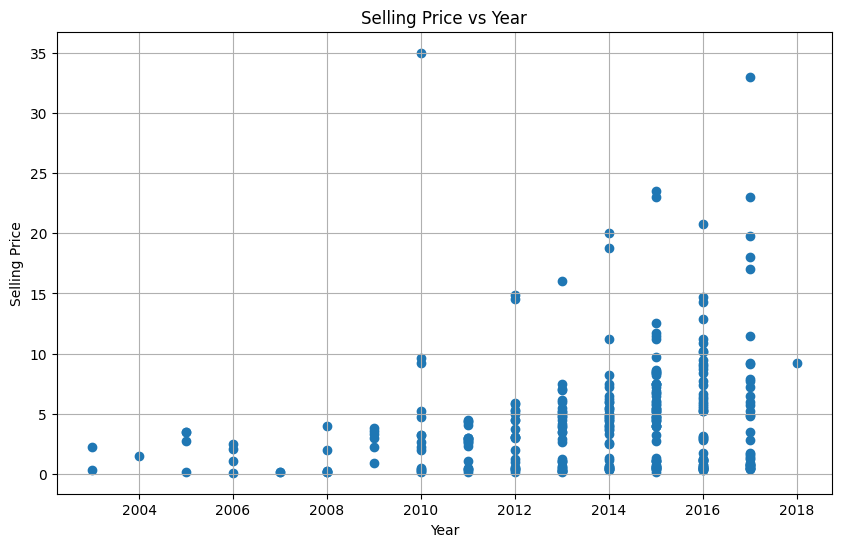

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(car_data['Year'], car_data['Selling_Price'])
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show

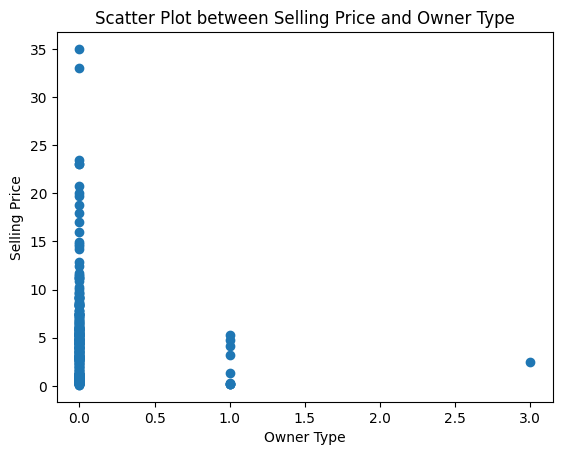

In [12]:
plt.scatter(car_data['Owner'], car_data['Selling_Price'])
plt.title('Scatter Plot between Selling Price and Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

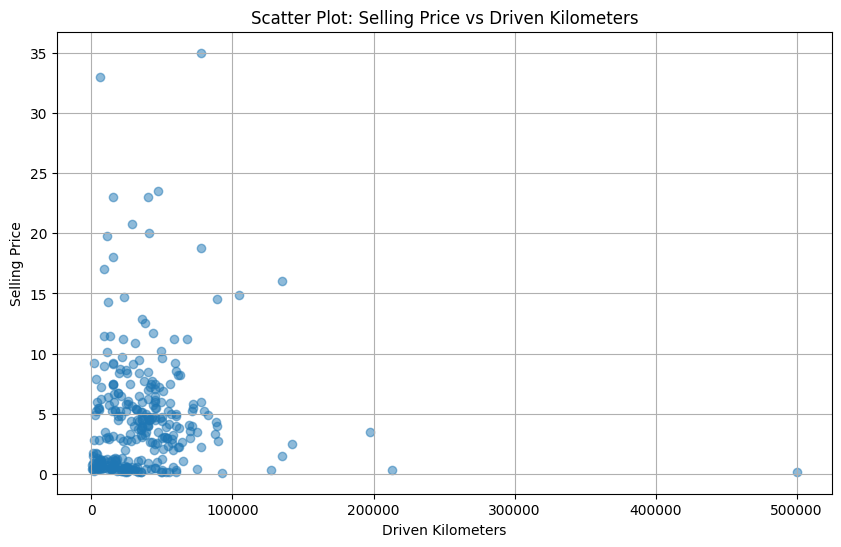

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(car_data['Driven_kms'], car_data['Selling_Price'], alpha=0.5)
plt.title('Scatter Plot: Selling Price vs Driven Kilometers')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Data pre-processing

Label Encoding for Categorical Variables

In [14]:
# create a copy of Original data
data = car_data.copy()

In [15]:
le = LabelEncoder()
data["Fuel_Type"] = le.fit_transform(data["Fuel_Type"])
data["Transmission"] = le.fit_transform((data["Transmission"]))
data["Selling_type"] = le.fit_transform(data["Selling_type"])

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


Feature Engineering

In [17]:
# Now Create new columns name as car_age
# It is very useful feature because as much as age of car increase then selling price is decreasing
current_year = 2024
data["car_age"] = current_year - data["Year"]

In [18]:
# Now drop year columns because "car_age" columns have similar data
new_data = data.drop('Year',axis=1)

In [19]:
new_data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,2,0,1,0,10
1,sx4,4.75,9.54,43000,1,0,1,0,11
2,ciaz,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2.85,4.15,5200,2,0,1,0,13
4,swift,4.60,6.87,42450,1,0,1,0,10


In [20]:
new_data = new_data.drop('Car_Name', axis=1)

Feature Scaling

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)

In [22]:
# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=new_data.columns)

In [23]:
data_scaled

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,0.093123,0.057109,0.053053,1.0,0.0,1.0,0.0,0.266667
1,0.133238,0.099913,0.085085,0.5,0.0,1.0,0.0,0.333333
2,0.204871,0.103273,0.012813,1.0,0.0,1.0,0.0,0.066667
3,0.078797,0.041504,0.009409,1.0,0.0,1.0,0.0,0.466667
4,0.128940,0.070980,0.083984,0.5,0.0,1.0,0.0,0.266667
...,...,...,...,...,...,...,...,...
294,0.269341,0.122237,0.067043,0.5,0.0,1.0,0.0,0.133333
295,0.111748,0.060468,0.119119,1.0,0.0,1.0,0.0,0.200000
296,0.093123,0.115735,0.175043,1.0,0.0,1.0,0.0,0.600000
297,0.326648,0.131990,0.017017,0.5,0.0,1.0,0.0,0.066667


Correlation between data

In [24]:
corr_matrix = data_scaled.corr()
corr_matrix

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
Selling_Price,1.000000,0.876305,0.028566,-0.500292,-0.553851,-0.348869,-0.087880,-0.234369
Present_Price,0.876305,1.000000,0.205224,-0.431887,-0.511779,-0.334326,0.009948,0.053167
Driven_kms,0.028566,0.205224,1.000000,-0.167287,-0.101030,-0.163881,0.089367,0.525714
Fuel_Type,-0.500292,-0.431887,-0.167287,1.000000,0.347922,0.068618,0.054174,0.046210
Selling_type,-0.553851,-0.511779,-0.101030,0.347922,1.000000,0.058669,0.123646,0.036820
Transmission,-0.348869,-0.334326,-0.163881,0.068618,0.058669,1.000000,-0.052166,-0.003434
Owner,-0.087880,0.009948,0.089367,0.054174,0.123646,-0.052166,1.000000,0.181639
car_age,-0.234369,0.053167,0.525714,0.046210,0.036820,-0.003434,0.181639,1.000000


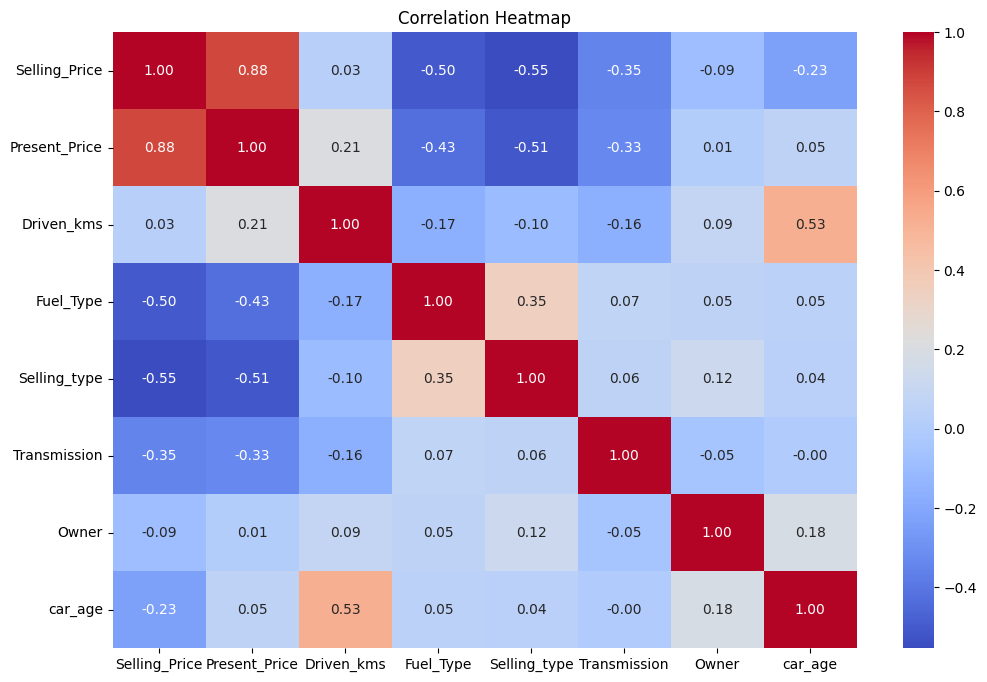

In [25]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Train Machine Learning Model

Split the data

In [26]:
X = data_scaled.drop('Selling_Price', axis=1)
y = data_scaled['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)


Choose and train the model

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

Make prediction

In [29]:
# Make predictions on the training set
train_predictions = model.predict(X_train)

In [30]:
# Make predictions on the testing set
test_predictions = model.predict(X_test)

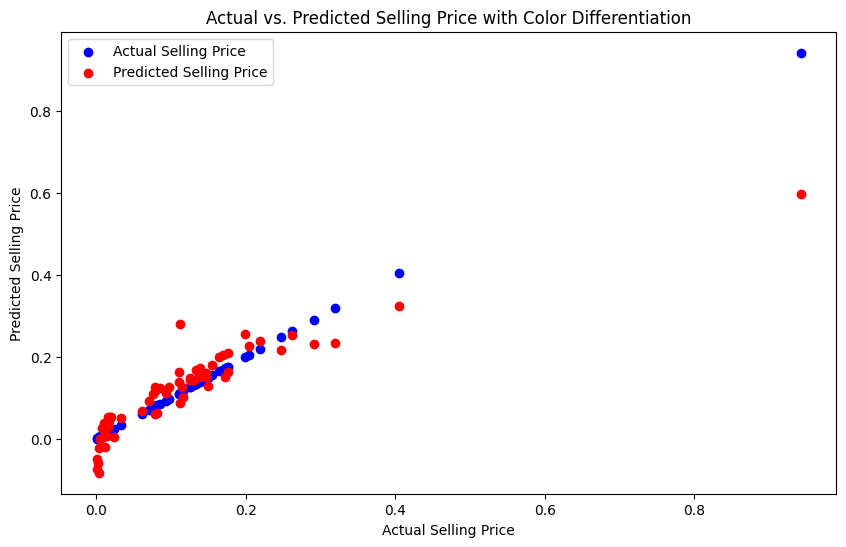

In [31]:
# Visualization of actual vs. predicted values with color differentiation
plt.figure(figsize=(10, 6))

# Scatter plot for actual values (in blue)
plt.scatter(y_test, y_test, color='blue', label='Actual Selling Price')

# Scatter plot for predicted values (in red)
plt.scatter(y_test, test_predictions, color='red', label='Predicted Selling Price')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price with Color Differentiation')
plt.legend()
plt.show()

# Evaluate model

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.003678816179717397
Root Mean Squared Error: 0.06065324541784551
R-squared: 0.8073225890126082
